In [2]:
from typeguard.importhook import install_import_hook
install_import_hook('repl')

ModuleNotFoundError: No module named 'typeguard.importhook'

In [1]:
%autoreload 2

In [3]:
from policies import MinimaxPolicy, RandPolicy, AlphaBeta, MCTS
import game
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [4]:
def mcts_game():
    players = [MCTS(0, limit=3), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=1, log=True)
    sim.go()
    return sim

In [16]:
def rand_game():
    players = [RandPolicy(0), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=800)
    sim.run()
    return sim

In [17]:
rand_games = [rand_game() for _ in range(50)]

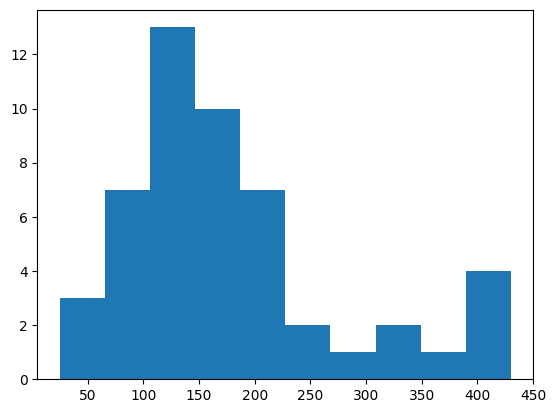

In [22]:
plt.hist([g.current_round for g in rand_games]);

In [27]:
np.mean([g.winner() for g in rand_games])

0.62

In [30]:
def minimax_rand():
    players = [MinimaxPolicy(0), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=700)
    sim.run()
    return sim

In [31]:
mm_games = [minimax_rand() for _ in range(20)]

In [32]:
np.mean([g.winner() for g in mm_games])

0.1

So Minimax, even with depth 3 and no hueristic, is already way better than random!

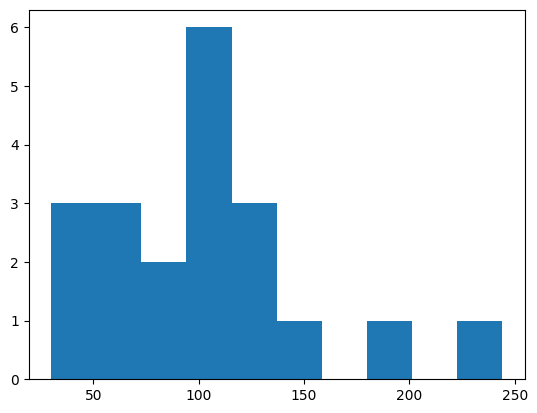

In [33]:
plt.hist([g.current_round for g in mm_games]);

It seems like the games are ending faster too

In [13]:
def ab_rand():
    players = [AlphaBeta(0), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=700)
    sim.run()
    return sim

In [14]:
ab_games = [ab_rand() for _ in range(20)]

In [15]:
np.mean([g.winner() for g in ab_games])

0.25

As expected, we do even better with Alpha Beta pruning.

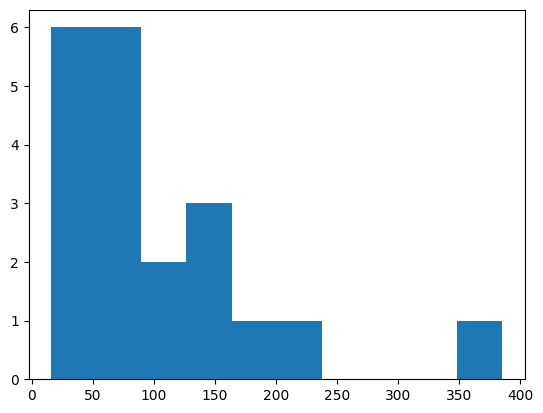

In [16]:
plt.hist([g.current_round for g in ab_games]);

Hm: but the games are taking longer? Could also be sample quirks. 20 games isn't much of a sample. 

In [24]:
def minimax_game():
    players = [MinimaxPolicy(0), MinimaxPolicy(1)]
    sim = game.GameSimulator(players, n_steps=1000)
    sim.run()